In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("bank.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


##Summay of data

###Categorical Variables :
####[1] job : admin,technician, services, management, retired, blue-collar, unemployed, entrepreneur, housemaid, unknown, self-employed, student
####[2] marital : married, single, divorced
####[3] education: secondary, tertiary, primary, unknown
####[4] default : yes, no
####[5] housing : yes, no
####[6] loan : yes, no
####[7] deposit : yes, no (Dependent Variable)
####[8] contact : unknown, cellular, telephone
####[9] month : jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec
####[10] poutcome: unknown, other, failure, success

###Numerical Variables:
####[1] age
####[2] balance
####[3] day
####[4] duration
####[5] campaign
####[6] pdays
####[7] previous

### Check if the data set contains any null values

In [ ]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


## Boxplot for 'age'

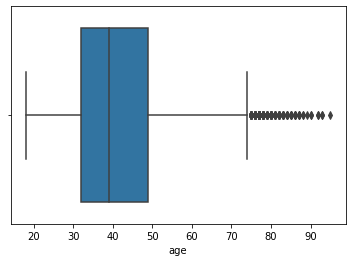

In [ ]:
age = sns.boxplot(x=data["age"])

### Distribution of Age

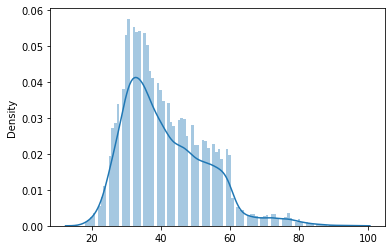

In [ ]:
sns.distplot(x=data['age'], bins=100)

##Boxplot for 'duration'

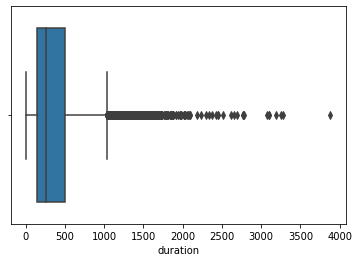

In [ ]:
g = sns.boxplot(x=data["duration"])

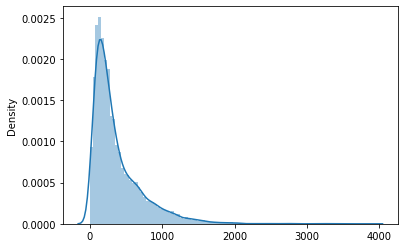

In [ ]:
sns.distplot(x=data["duration"], bins=100)

#Convert categorical data

In [ ]:
# Make a copy for parsing
bank_data = data.copy()

##Job

In [ ]:
print(bank_data['job'].value_counts())

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64


## Explore People who made a deposit Vs Job category

In [ ]:
print(bank_data['job'].unique())

['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']


In [ ]:
jobs =['admin.' ,'technician' ,'services' ,'management' ,'retired' ,'blue-collar',
 'unemployed', 'entrepreneur', 'housemaid', 'unknown' ,'self-employed',
 'student']
 
for j in jobs:
  print("{:15} : {:5}".format(j,len(bank_data[(bank_data.deposit == "yes") & (bank_data.job == j)])))

admin.          :   631
technician      :   840
services        :   369
management      :  1301
retired         :   516
blue-collar     :   708
unemployed      :   202
entrepreneur    :   123
housemaid       :   109
unknown         :    34
self-employed   :   187
student         :   269


###Combine similar jobs into categiroes

In [ ]:
bank_data['job'] = bank_data['job'].replace(['management','admin.'],'white-collar')
bank_data['job'] = bank_data['job'].replace(['services','housemaid'],'pink-collar')
bank_data['job'] = bank_data['job'].replace(['student','unknown','unemployed','retired'],'other')

####new value counts

In [ ]:
bank_data.job.value_counts()

white-collar     3900
blue-collar      1944
technician       1823
other            1565
pink-collar      1197
self-employed     405
entrepreneur      328
Name: job, dtype: int64

####Poutcome

In [ ]:
bank_data.poutcome.value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

###### Combine 'unknown' and 'other' as 'other' isn't really match with either 'success' or 'failure'

In [ ]:
bank_data['poutcome'] = bank_data['poutcome'].replace(['other'],'unknown')
bank_data.poutcome.value_counts()

unknown    8863
failure    1228
success    1071
Name: poutcome, dtype: int64

In [ ]:
# Drop 'contact', as every participant has been contacted.
bank_data.drop('contact',axis=1,inplace=True)

###Default

In [ ]:
bank_data['default']
bank_data['new_default'] = bank_data['default'].map({'yes':1,'no':0})
bank_data.drop('default',axis=1,inplace=True)

###Housing

In [ ]:
bank_data['housing']
bank_data['new_housing'] = bank_data['housing'].map({'yes':1,'no':0})
bank_data.drop('housing',axis=1,inplace=True)

###Loan

In [ ]:
bank_data['loan']
bank_data['new_loan'] = bank_data['loan'].map({'yes':1,'no':0})
bank_data.drop('loan',axis=1,inplace=True)

In [ ]:
bank_data.drop('month',axis=1,inplace=True)
bank_data.drop('day',axis=1,inplace=True)

###Deposit

In [ ]:
bank_data['deposit']
bank_data['new_deposit'] = bank_data['deposit'].map({'yes':1,'no':0})
bank_data.drop('deposit',axis=1,inplace=True)

In [ ]:
# Map padys=-1 into a large value (10000 is used) to indicate that it is so far in the past that it has no effect
bank_data.loc[bank_data['pdays'] == -1, 'pdays'] = 10000

In [ ]:
# Create a new column: recent_pdays 
bank_data['recent_pdays'] = np.where(bank_data['pdays'], 1/bank_data.pdays, 1/bank_data.pdays)

In [ ]:
# Drop 'pdays'
bank_data.drop('pdays', axis=1, inplace = True)

In [ ]:
bank_data.tail()

,age,job,marital,education,balance,duration,campaign,previous,poutcome,new_default,new_housing,new_loan,new_deposit,recent_pdays
11157,33,blue-collar,single,primary,1,257,1,0,unknown,0,1,0,0,0.000100
11158,39,pink-collar,married,secondary,733,83,4,0,unknown,0,0,0,0,0.000100
11159,32,technician,single,secondary,29,156,2,0,unknown,0,0,0,0,0.000100
11160,43,technician,married,secondary,0,9,2,5,failure,0,0,1,0,0.005814
11161,34,technician,married,secondary,0,628,1,0,unknown,0,0,0,0,0.000100


##Convert to dummy values

In [ ]:
bank_data_with_dummies = pd.get_dummies(data=bank_data,columns=['job','marital','education','poutcome'],prefix=['job','marital','education','poutcome'])
bank_data_with_dummies.head()

,age,balance,duration,campaign,previous,new_default,new_housing,new_loan,new_deposit,recent_pdays,job_blue-collar,job_entrepreneur,job_other,job_pink-collar,job_self-employed,job_technician,job_white-collar,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
0,59,2343,1042,1,0,0,1,0,1,0.0001,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
1,56,45,1467,1,0,0,0,0,1,0.0001,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
2,41,1270,1389,1,0,0,1,0,1,0.0001,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1
3,55,2476,579,1,0,0,1,0,1,0.0001,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
4,54,184,673,2,0,0,0,0,1,0.0001,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1


In [ ]:
bank_data_with_dummies.shape

(11162, 27)

In [ ]:
bank_data_with_dummies.describe()

,age,balance,duration,campaign,previous,new_default,new_housing,new_loan,new_deposit,recent_pdays,job_blue-collar,job_entrepreneur,job_other,job_pink-collar,job_self-employed,job_technician,job_white-collar,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,371.993818,2.508421,0.832557,0.015051,0.473123,0.130801,0.473840,0.003124,0.174162,0.029385,0.140208,0.107239,0.036284,0.163322,0.349400,0.115839,0.568984,0.315176,0.134385,0.490593,0.330496,0.044526,0.110016,0.095951,0.794033
std,11.913369,3225.413326,347.128386,2.722077,2.292007,0.121761,0.499299,0.337198,0.499338,0.030686,0.379266,0.168892,0.347218,0.309431,0.187004,0.369676,0.476802,0.320047,0.495241,0.464607,0.341080,0.499934,0.470413,0.206270,0.312924,0.294537,0.404424
min,18.000000,-6847.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,122.000000,138.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,550.000000,255.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,49.000000,1708.000000,496.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.001919,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,81204.000000,3881.000000,63.000000,58.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


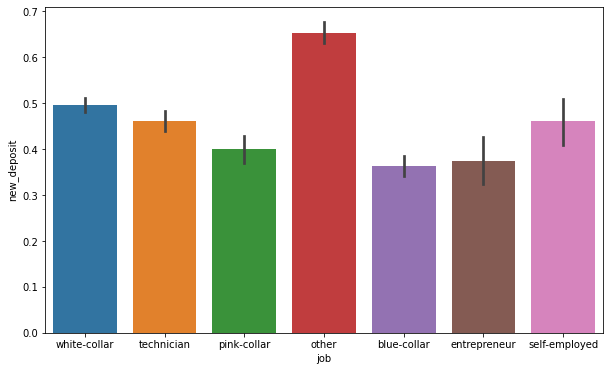

In [ ]:
# Bar chart of job Vs deposite
plt.figure(figsize = (10,6))
sns.barplot(x='job', y = 'new_deposit', data = bank_data)

##Classification

In [ ]:
# make a copy
bankcl = bank_data_with_dummies

### The Correlation

In [ ]:
corr = bankcl.corr()
corr

,age,balance,duration,campaign,previous,new_default,new_housing,new_loan,new_deposit,recent_pdays,job_blue-collar,job_entrepreneur,job_other,job_pink-collar,job_self-employed,job_technician,job_white-collar,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
age,1.000000,0.112300,0.000189,-0.005278,0.020169,-0.011425,-0.168700,-0.031418,0.034901,0.019102,-0.066567,0.024176,0.296418,-0.027942,-0.023163,-0.082716,-0.080122,0.186349,0.318436,-0.467799,0.231150,-0.094400,-0.101372,0.077761,-0.008071,0.062114,-0.038992
balance,0.112300,1.000000,0.022436,-0.013894,0.030805,-0.060954,-0.077092,-0.084589,0.081129,-0.004379,-0.046220,0.005039,0.050744,-0.041063,0.020264,0.003802,0.013780,-0.017586,0.025431,-0.014994,-0.000673,-0.070609,0.069128,0.014596,0.001695,0.045603,-0.034524
duration,0.000189,0.022436,1.000000,-0.041557,-0.026716,-0.009760,0.035051,-0.001914,0.451919,-0.014868,0.029986,-0.000908,0.010680,0.005345,0.013506,-0.010440,-0.031980,0.021364,-0.036179,0.023847,0.013405,0.003820,-0.006813,-0.015887,-0.033966,-0.022578,0.042725
campaign,-0.005278,-0.013894,-0.041557,1.000000,-0.049699,0.030975,0.006660,0.034722,-0.128081,-0.026296,0.005522,0.013883,-0.050212,0.011958,0.001776,0.021738,0.001944,-0.006828,0.047722,-0.046165,0.019915,-0.013834,-0.005427,0.012976,-0.080188,-0.091807,0.128907
previous,0.020169,0.030805,-0.026716,-0.049699,1.000000,-0.035273,-0.000840,-0.022668,0.139867,0.122076,-0.039939,-0.022470,0.031191,-0.028623,-0.002338,0.002035,0.034929,-0.026566,-0.005176,0.023817,-0.024852,-0.004620,0.028146,-0.011898,0.335870,0.325477,-0.496921
new_default,-0.011425,-0.060954,-0.009760,0.030975,-0.035273,1.000000,0.011076,0.076434,-0.040680,-0.011290,0.022779,0.022060,-0.018130,-0.007173,0.007493,0.003109,-0.013425,0.019633,-0.006819,-0.006255,0.013858,-0.000618,-0.011768,0.005421,-0.024650,-0.040272,0.048403
new_housing,-0.168700,-0.077092,0.035051,0.006660,-0.000840,0.011076,1.000000,0.076761,-0.203888,-0.029350,0.189848,0.011492,-0.233309,0.043884,-0.016903,0.006551,-0.012111,0.007430,0.036305,-0.043817,0.017002,0.118514,-0.114955,-0.053191,0.087741,-0.136299,0.031375
new_loan,-0.031418,-0.084589,-0.001914,0.034722,-0.022668,0.076434,0.076761,1.000000,-0.110580,-0.012697,0.057956,0.042631,-0.096196,0.014969,0.004299,0.006864,-0.007871,0.026463,0.044148,-0.065288,0.006854,0.079583,-0.067513,-0.050249,0.006264,-0.080370,0.053686
new_deposit,0.034901,0.081129,0.451919,-0.128081,0.139867,-0.040680,-0.203888,-0.110580,1.000000,0.034457,-0.100840,-0.034443,0.144408,-0.051717,-0.004707,-0.011557,0.031621,0.005228,-0.092157,0.094632,-0.063002,-0.051952,0.094598,0.014355,0.020714,0.286642,-0.224785
recent_pdays,0.019102,-0.004379,-0.014868,-0.026296,0.122076,-0.011290,-0.029350,-0.012697,0.034457,1.000000,-0.018514,0.006251,0.024356,-0.001183,-0.008226,-0.007412,0.004516,-0.020253,0.009583,0.003736,-0.007034,-0.017129,0.017346,0.013590,0.051422,0.119598,-0.126890


##Heatmap

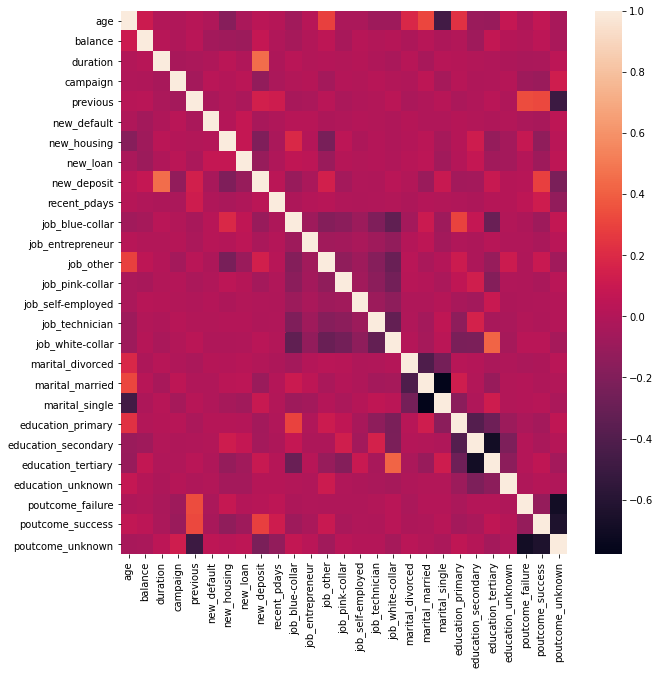

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(corr)

In [ ]:
# Extract the deposte_cat column (the dependent variable)
corr_deposite = pd.DataFrame(corr['new_deposit'].drop('new_deposit'))
corr_deposite.sort_values(by = 'new_deposit', ascending = False)

,new_deposit
duration,0.451919
poutcome_success,0.286642
job_other,0.144408
previous,0.139867
marital_single,0.094632
education_tertiary,0.094598
balance,0.081129
age,0.034901
recent_pdays,0.034457
job_white-collar,0.031621


##Build the Data Model

###Train_test Split

In [ ]:
x = bankcl.drop('new_deposit',1)
y = bankcl.new_deposit

train_x , test_x , train_y ,test_y = train_test_split(x,y,test_size =0.2,random_state = 50)

## Decision Tree

#### Decision tree with depth = 2

In [ ]:
dt2 = DecisionTreeClassifier(random_state=1,max_depth=2)
dt2.fit(train_x,train_y)
dt2_score_train = dt2.score(train_x,train_y)
print("Trining Score:",dt2_score_train)

dt2_score_test = dt2.score(test_x,test_y)
print("Testing Score : " , dt2_score_test)

Trining Score: 0.7285250307985217
Testing Score :  0.7268248992386923


#### Decision tree with depth = 3


In [ ]:
dt3 = DecisionTreeClassifier(random_state=1,max_depth=3)
dt3.fit(train_x,train_y)
dt3_score_train = dt3.score(train_x,train_y)
print("Trining Score:",dt3_score_train)

dt3_score_test = dt3.score(test_x,test_y)
print("Testing Score : " , dt3_score_test)

Trining Score: 0.770411020271027
Testing Score :  0.7572772055530677


#### Decision tree with depth = 4

In [ ]:
dt4 = DecisionTreeClassifier(random_state=1,max_depth=4)
dt4.fit(train_x,train_y)
dt4_score_train = dt4.score(train_x,train_y)
print("Trining Score:",dt4_score_train)

dt4_score_test = dt4.score(test_x,test_y)
print("Testing Score : " , dt4_score_test)

Trining Score: 0.7885541494008288
Testing Score :  0.774294670846395


###Decision tree with depth = 6

In [ ]:
dt6 = DecisionTreeClassifier(random_state=1,max_depth=6)
dt6.fit(train_x,train_y)
dt6_score_train = dt6.score(train_x,train_y)
print("Trining Score:",dt6_score_train)

dt6_score_test = dt6.score(test_x,test_y)
print("Testing Score : " , dt6_score_test)

Trining Score: 0.8080412140217269
Testing Score :  0.7796686072548141


###Decision tree: To the full depth

In [ ]:
dt1 = DecisionTreeClassifier(random_state=1)
dt1.fit(train_x,train_y)
dt1_score_train = dt2.score(train_x,train_y)
print("Trining Score:",dt1_score_train)

dt1_score_test = dt1.score(test_x,test_y)
print("Testing Score : " , dt1_score_test)

Trining Score: 1.0
Testing Score :  0.7384684281236006


###Compare Training and Testing scores for various tree depths used

In [ ]:
print('{:10} {:20} {:20}'.format('depth', 'Training score','Testing score'))
print('{:10} {:20} {:20}'.format('-----', '--------------','-------------'))
print('{:1} {:>25} {:>20}'.format(2, dt2_score_train, dt2_score_test))
print('{:1} {:>25} {:>20}'.format(3, dt3_score_train, dt3_score_test))
print('{:1} {:>25} {:>20}'.format(4, dt4_score_train, dt4_score_test))
print('{:1} {:>25} {:>20}'.format(6, dt6_score_train, dt6_score_test))
print('{:1} {:>23} {:>20}'.format("max", dt1_score_train, dt1_score_test))

depth      Training score       Testing score       
-----      --------------       -------------       
2        0.7885541494008288   0.7384684281236006
3         0.770411020271027   0.7572772055530677
4        0.7885541494008288    0.774294670846395
6        0.8080412140217269   0.7796686072548141
max                     1.0   0.7384684281236006


#####It could be seen that, higher the depth, training score increases and matches perfects with the training data set. However higher the depth the tree goes, it overfit to the training data set. So it's no use keep increasing the tree depth. According to above observations, tree with a depth of 2 seems more reasonable as both training and test scores are reasonably high.